<a href="https://colab.research.google.com/github/rafat0819/Regression-Analysis/blob/main/Correlation_of_COVID_19_and_Diabetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DiabetesAtlas_Alabama.csv to DiabetesAtlas_Alabama.csv
Saving DiabetesAtlas_Colorado.csv to DiabetesAtlas_Colorado.csv
Saving DiabetesAtlas_Connecticut.csv to DiabetesAtlas_Connecticut.csv
Saving DiabetesAtlas_Florida (1).csv to DiabetesAtlas_Florida (1).csv
Saving DiabetesAtlas_Louisiana (4).csv to DiabetesAtlas_Louisiana (4).csv
Saving DiabetesAtlas_Michigan.csv to DiabetesAtlas_Michigan.csv
Saving DiabetesAtlas_Mississippi.csv to DiabetesAtlas_Mississippi.csv
Saving DiabetesAtlas_Missouri (4).csv to DiabetesAtlas_Missouri (4).csv
Saving DiabetesAtlas_Montana (5).csv to DiabetesAtlas_Montana (5).csv
Saving DiabetesAtlas_Ohio (9).csv to DiabetesAtlas_Ohio (9).csv
Saving DiabetesAtlas_Pennsylvania.csv to DiabetesAtlas_Pennsylvania.csv
Saving DiabetesAtlas_South Carolina.csv to DiabetesAtlas_South Carolina.csv


In [ ]:
import pandas as pd
import numpy as np

from dython import nominal

In [ ]:
import glob
file_list = glob.glob('DiabetesAtlas_*.csv')

In [ ]:
all_dfs = []
state_list = []
for one_file in file_list:
  print(f'Loading {one_file}')
  new_df = pd.read_csv(one_file, skiprows=2, skipfooter=1, engine='python')
  new_df = new_df[new_df.columns[:-1]]
  state = one_file[14:-4].split(' (')[0]
  state_list.append(state)
  new_df['State'] = state
  all_dfs.append(new_df[new_df.Year >= 2018])

Loading DiabetesAtlas_Colorado.csv
Loading DiabetesAtlas_Missouri (4).csv
Loading DiabetesAtlas_Pennsylvania.csv
Loading DiabetesAtlas_Michigan.csv
Loading DiabetesAtlas_Montana (5).csv
Loading DiabetesAtlas_Louisiana (4).csv
Loading DiabetesAtlas_Florida (1).csv
Loading DiabetesAtlas_South Carolina.csv
Loading DiabetesAtlas_Alabama.csv
Loading DiabetesAtlas_Ohio (9).csv
Loading DiabetesAtlas_Mississippi.csv
Loading DiabetesAtlas_Connecticut.csv


In [ ]:
df = pd.concat(all_dfs, ignore_index=True)
df = df[['Year', '18-44 - Percentage', '45-64 - Percentage', '65-74 - Percentage', '75+ - Percentage', 'State']]
df.columns = ['Year', 'age_18_14', 'age_45_64', 'age_65_74', 'age_75+', 'State']

In [ ]:
df_per_chng = pd.pivot_table(df,index=['State', 'Year'], columns=[]).pct_change().mul(100)
df_per_chng = df_per_chng.reset_index()

before_df = df_per_chng.loc[df_per_chng.Year == 2019].reset_index(drop=True)
after_df = df_per_chng.loc[df_per_chng.Year == 2020].reset_index(drop=True)

In [ ]:
df_per_chng = df_per_chng.loc[df_per_chng.Year > 2018]

[]

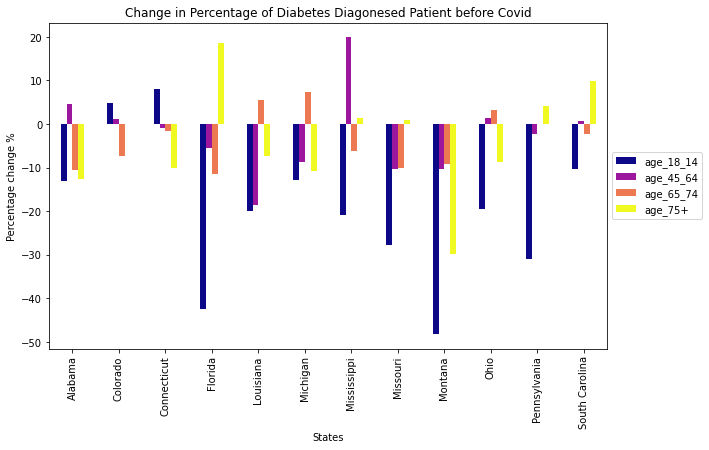

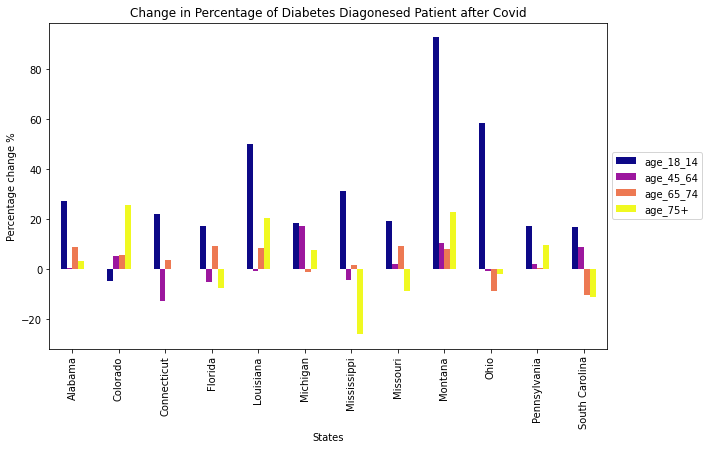

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# plt.bar(before, before, align='center', alpha=0.5 )
before_plot = before_df.plot('State', ['age_18_14', 'age_45_64', 'age_65_74', 'age_75+'], 
                             kind="bar", 
                             xlabel="States", 
                             ylabel="Percentage change %", 
                             figsize=(10, 6), 
                             colormap=cm.plasma)

before_plot.set_title("Change in Percentage of Diabetes Diagonesed Patient before Covid")
before_plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
before_plot.plot()

after_plot = after_df.plot('State', ['age_18_14', 'age_45_64', 'age_65_74', 'age_75+'], 
                           kind="bar", 
                           xlabel="States", 
                           ylabel="Percentage change %", 
                           figsize=(10, 6), 
                           colormap=cm.plasma)

after_plot.set_title("Change in Percentage of Diabetes Diagonesed Patient after Covid")
after_plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
after_plot.plot()

In [ ]:
df_per_chng.head()

,State,Year,age_18_14,age_45_64,age_65_74,age_75+
1,Alabama,2019,-13.157895,4.687500,-10.508475,-12.587413
2,Alabama,2020,27.272727,0.497512,9.090909,3.200000
4,Colorado,2019,4.761905,1.098901,-7.361963,0.000000
5,Colorado,2020,-4.545455,5.434783,5.960265,25.925926
7,Connecticut,2019,8.000000,-0.833333,-1.587302,-10.138249


In [ ]:
corr_df = pd.pivot_table(df_per_chng,index=['Year'], columns=['State'])
corr_df

age_18_14                                                        \
State    Alabama  Colorado Connecticut    Florida Louisiana   Michigan   
Year                                                                     
2019  -13.157895  4.761905    8.000000 -42.500000     -20.0 -12.903226   
2020   27.272727 -4.545455   22.222222  17.391304      50.0  18.518519   

                                                    ...     age_75+  \
State Mississippi   Missouri    Montana       Ohio  ... Connecticut   
Year                                                ...               
2019   -20.833333 -27.777778 -48.148148 -19.444444  ...  -10.138249   
2020    31.578947  19.230769  92.857143  58.620690  ...    0.000000   

                                                                         \
State    Florida  Louisiana   Michigan Mississippi  Missouri    Montana   
Year                                                                      
2019   18.660287  -7.272727 -10.843373    1.393728  0.913242 -29.716981   
2020   -7.258065  20.392157   7.657658  -25.773196 -8.597285  22.818792   

                                             
State      Ohio Pennsylvania South Carolina  
Year                                         
2019  -8.800000      4.12844       9.756098  
2020  -1.754386      9.69163     -11.111111  

[2 rows x 48 columns]

In [ ]:
corr_df.columns.get_level_values(0)
corr_df.columns = [' '.join(col).strip() for col in corr_df.columns.values]
t_corr_df = corr_df.T
t_corr_df.head()

Year,2019,2020
age_18_14 Alabama,-13.157895,27.272727
age_18_14 Colorado,4.761905,-4.545455
age_18_14 Connecticut,8.000000,22.222222
age_18_14 Florida,-42.500000,17.391304
age_18_14 Louisiana,-20.000000,50.000000


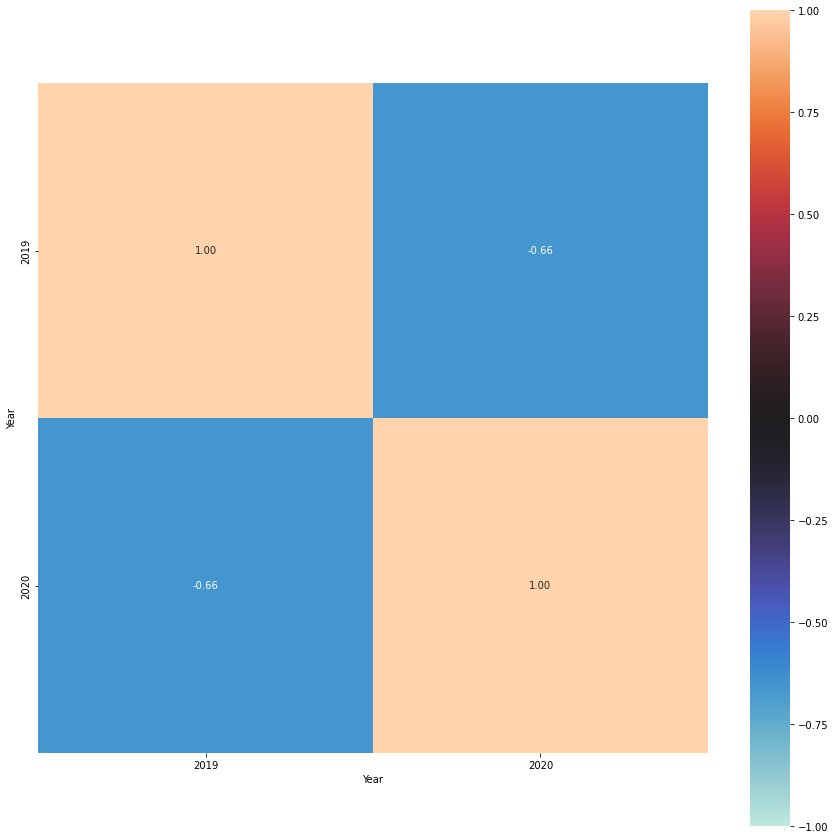

{'corr': Year      2019      2020
 Year                    
 2019  1.000000 -0.659131
 2020 -0.659131  1.000000, 'ax': <AxesSubplot:xlabel='Year', ylabel='Year'>}

In [ ]:
nominal.associations(t_corr_df, nom_num_assoc='correlation_ratio', figsize=(15, 15))